# Overview

- Understand statistical signifcance of features
- Create Visualization to convery statistical significance

## Methods

## Data Import

In [20]:
import pandas as pd
pd.set_option("display.max_columns", 300)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stat

%matplotlib inline

In [2]:
clean_df = pd.read_csv(r"..\data\diabetic_data_preclean.csv", index_col=0)

In [3]:
clean_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,2
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,Ch,Yes,0


### Affect of number of medication on readmission 

In [6]:
clean_df["num_medications"].describe()

count    101763.000000
mean         16.021835
std           8.127589
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64

In [4]:
x0 = clean_df[clean_df.readmitted == 0]["num_medications"]
x1 = clean_df[clean_df.readmitted == 1]["num_medications"]
x2 = clean_df[clean_df.readmitted == 2]["num_medications"]

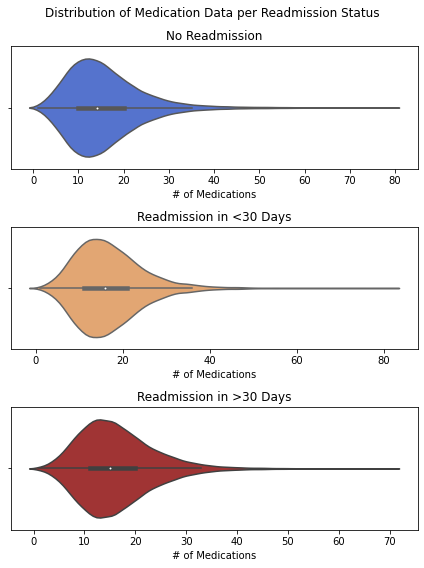

In [19]:
fig, ax = plt.subplots(3,1, figsize=(6,8))
sns.violinplot(x0, color="royalblue", alpha=0.7, ax=ax[0])
ax[0].set_title("No Readmission")
ax[0].set_xlabel("# of Medications")

sns.violinplot(x1, color="sandybrown", alpha=0.7, ax=ax[1])
ax[1].set_title("Readmission in <30 Days")
ax[1].set_xlabel("# of Medications")

sns.violinplot(x2, color="firebrick", alpha=0.7, ax=ax[2])
ax[2].set_title("Readmission in >30 Days")
ax[2].set_xlabel("# of Medications")

plt.suptitle("Distribution of Medication Data per Readmission Status")
plt.tight_layout() #make it neat

In [29]:
clean_df.diag_1.value_counts().describe()

count     717.000000
mean      141.928870
std       515.988512
min         1.000000
25%         3.000000
50%        12.000000
75%        66.000000
max      6862.000000
Name: diag_1, dtype: float64

0.0697350069735007

In [52]:
clean_df.diag_1.value_counts().apply(lambda x: x if x >= 1000 else np.nan).dropna().sum()/clean_df.shape[0]

0.5494727946306615

In [53]:
clean_df.diag_1.value_counts().apply(lambda x: x if x >= 1000 else np.nan).dropna()

428      6862.0
414      6580.0
786      4016.0
410      3614.0
486      3508.0
427      2766.0
491      2275.0
715      2151.0
682      2042.0
434      2028.0
780      2019.0
996      1967.0
276      1889.0
38       1688.0
250.8    1680.0
599      1595.0
584      1520.0
V57      1207.0
250.6    1183.0
518      1115.0
820      1082.0
577      1057.0
493      1056.0
435      1016.0
Name: diag_1, dtype: float64

In [45]:
clean_df.diag_1.value_counts().apply(lambda x: x if x == 1 else np.nan).dropna()

Series([], Name: diag_1, dtype: float64)